# Get different sentiment algorithms and compare them

In [36]:
import os
import sys
import dotenv
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

In [37]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from quantnote_query_api.query_api_client import QuantNoteQueryApi

## Create api client

In [38]:
dotenv.load_dotenv(".env")
AUTH_TOKEN = os.getenv("AUTH_TOKEN")
client = QuantNoteQueryApi(auth_token=AUTH_TOKEN, api_version="v1")
client

In [39]:
sent1_query = """SELECT date_trunc('hour', created_at) as time, avg(emotion) as sentiment
FROM pubs.articles.docs
where created_at >= now() - interval '15' day
  and contains(tags, 'btc')
group by 1
order by 1;"""

sent1 = client.get_data_response(sent1_query)
sent1['time'] = pd.to_datetime(sent1['time'])
sent1.set_index('time')
sent1['sentiment'] = pd.to_numeric(sent1['sentiment'])
sent1['ewm'] = sent1['sentiment'].ewm(span=10,min_periods=0,adjust=False,ignore_na=False).mean()
sent1

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,sentiment,time,ewm
0,0.317382,2023-03-30 11:00:00+00:00,0.317382
1,0.447950,2023-03-30 12:00:00+00:00,0.341121
2,0.403717,2023-03-30 13:00:00+00:00,0.352502
3,0.181633,2023-03-30 14:00:00+00:00,0.321435
4,0.050200,2023-03-30 15:00:00+00:00,0.272120
...,...,...,...
305,-0.381800,2023-04-14 05:00:00+00:00,0.181837
306,0.445580,2023-04-14 06:00:00+00:00,0.229790
307,0.466783,2023-04-14 07:00:00+00:00,0.272880
308,0.232860,2023-04-14 08:00:00+00:00,0.265603


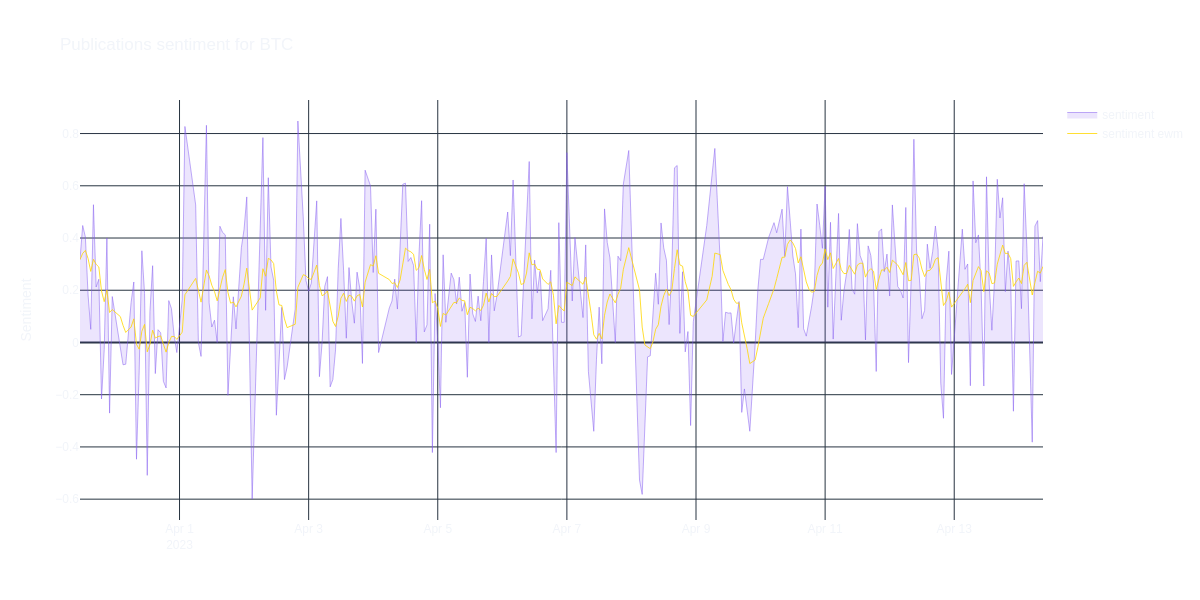

In [40]:
fig = make_subplots()

tg_sentiment = go.Scatter(x=sent1['time'],
                         y=sent1['sentiment'],
                         name="sentiment",
                         mode='lines',
                         line=dict(width=0.5, color='rgb(131, 90, 241)'),
                         fill='tozeroy',
                         fillcolor='rgba(131, 90, 241, 0.15)'
                         )
tg_sentiment_ewm = go.Scatter(x=sent1['time'],
                         y=sent1['ewm'],
                         name="sentiment ewm",
                         mode='lines',
                         line=dict(width=0.8, color='gold')
                         )

fig.add_trace(tg_sentiment)
fig.add_trace(tg_sentiment_ewm)

fig.update_layout(
    width=1200, height=600,
    title="Publications sentiment for BTC",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_rangeslider_visible=False
)

# Set y-axes titles
fig.update_yaxes(title_text="Sentiment")

fig.show("png")

In [41]:
sent2_query = """SELECT date_trunc('hour', created_at) as time, avg(emotion_2) as sentiment
FROM pubs.articles.docs
where created_at >= now() - interval '15' day
  and contains(tags, 'btc')
group by 1
order by 1;"""

sent2 = client.get_data_response(sent2_query)
sent2['time'] = pd.to_datetime(sent2['time'])
sent2.set_index('time')
sent2['sentiment'] = pd.to_numeric(sent2['sentiment'])
sent2['ewm'] = sent2['sentiment'].ewm(span=10,min_periods=0,adjust=False,ignore_na=False).mean()
sent2

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,sentiment,time,ewm
0,0.248650,2023-03-30 11:00:00+00:00,0.248650
1,0.221630,2023-03-30 12:00:00+00:00,0.243738
2,0.203769,2023-03-30 13:00:00+00:00,0.236471
3,0.096807,2023-03-30 14:00:00+00:00,0.211077
4,0.000000,2023-03-30 15:00:00+00:00,0.172700
...,...,...,...
305,0.000000,2023-04-14 05:00:00+00:00,0.071271
306,0.288696,2023-04-14 06:00:00+00:00,0.110803
307,0.000000,2023-04-14 07:00:00+00:00,0.090657
308,0.138966,2023-04-14 08:00:00+00:00,0.099440


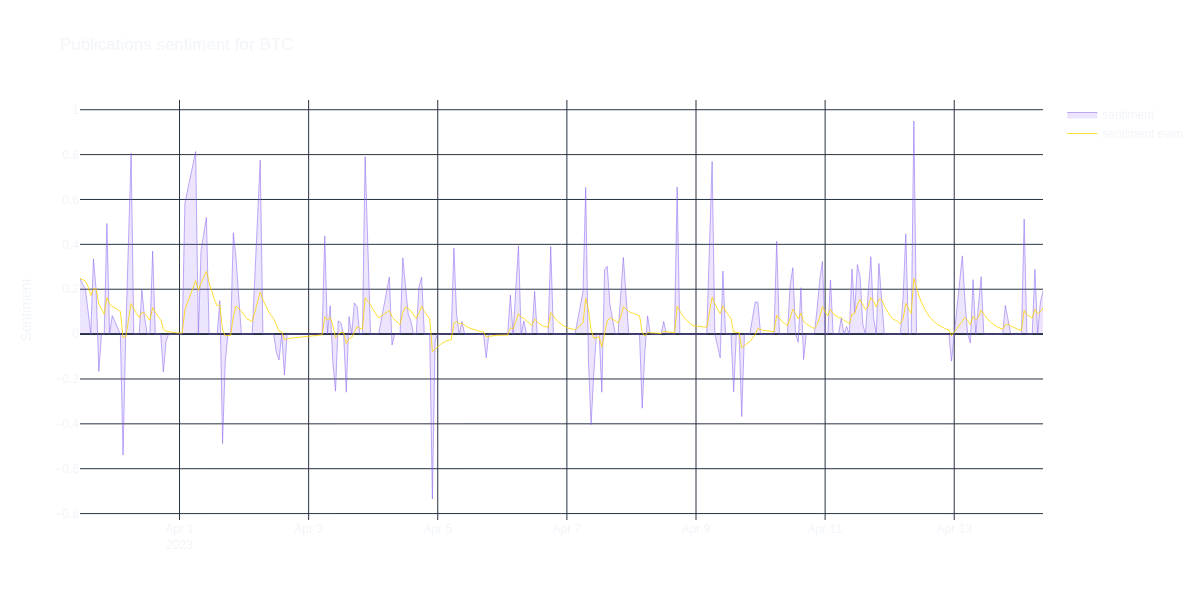

In [42]:
fig = make_subplots()

tg_sentiment = go.Scatter(x=sent2['time'],
                         y=sent2['sentiment'],
                         name="sentiment",
                         mode='lines',
                         line=dict(width=0.5, color='rgb(131, 90, 241)'),
                         fill='tozeroy',
                         fillcolor='rgba(131, 90, 241, 0.15)'
                         )
tg_sentiment_ewm = go.Scatter(x=sent2['time'],
                         y=sent2['ewm'],
                         name="sentiment ewm",
                         mode='lines',
                         line=dict(width=0.8, color='gold')
                         )

fig.add_trace(tg_sentiment)
fig.add_trace(tg_sentiment_ewm)

fig.update_layout(
    width=1200, height=600,
    title="Publications sentiment for BTC",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_rangeslider_visible=False
)

# Set y-axes titles
fig.update_yaxes(title_text="Sentiment")

fig.show("png")

In [43]:
sent3_query = """SELECT date_trunc('hour', created_at) as time, avg(emotion_3) as sentiment
FROM pubs.articles.docs
where created_at >= now() - interval '15' day
  and contains(tags, 'btc')
group by 1
order by 1;"""

sent3 = client.get_data_response(sent3_query)
sent3['time'] = pd.to_datetime(sent3['time'])
sent3.set_index('time')
sent3['sentiment'] = pd.to_numeric(sent3['sentiment'])
sent3['ewm'] = sent3['sentiment'].ewm(span=10,min_periods=0,adjust=False,ignore_na=False).mean()
sent3

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,sentiment,time,ewm
0,0.808278,2023-03-30 11:00:00+00:00,0.808278
1,0.833308,2023-03-30 12:00:00+00:00,0.812829
2,0.166740,2023-03-30 13:00:00+00:00,0.695359
3,0.499864,2023-03-30 14:00:00+00:00,0.659814
4,-0.499438,2023-03-30 15:00:00+00:00,0.449041
...,...,...,...
305,0.000000,2023-04-14 05:00:00+00:00,0.111955
306,0.397688,2023-04-14 06:00:00+00:00,0.163906
307,0.483538,2023-04-14 07:00:00+00:00,0.222021
308,0.318240,2023-04-14 08:00:00+00:00,0.239516


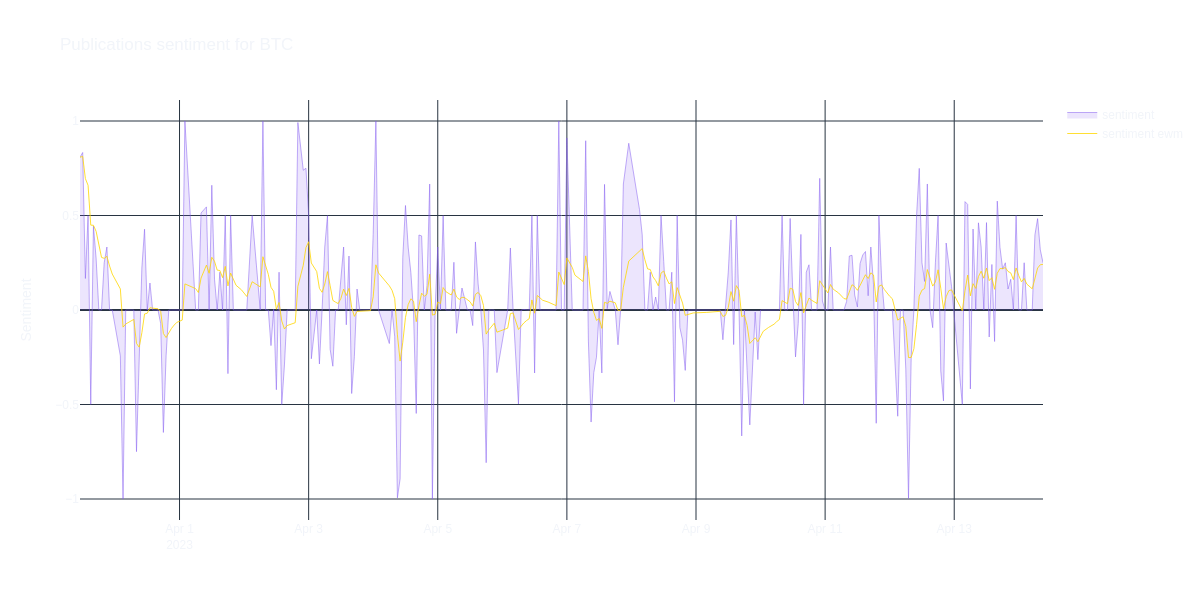

In [44]:
fig = make_subplots()

tg_sentiment = go.Scatter(x=sent3['time'],
                         y=sent3['sentiment'],
                         name="sentiment",
                         mode='lines',
                         line=dict(width=0.5, color='rgb(131, 90, 241)'),
                         fill='tozeroy',
                         fillcolor='rgba(131, 90, 241, 0.15)'
                         )
tg_sentiment_ewm = go.Scatter(x=sent3['time'],
                         y=sent3['ewm'],
                         name="sentiment ewm",
                         mode='lines',
                         line=dict(width=0.8, color='gold')
                         )

fig.add_trace(tg_sentiment)
fig.add_trace(tg_sentiment_ewm)

fig.update_layout(
    width=1200, height=600,
    title="Publications sentiment for BTC",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_rangeslider_visible=False
)

# Set y-axes titles
fig.update_yaxes(title_text="Sentiment")

fig.show("png")

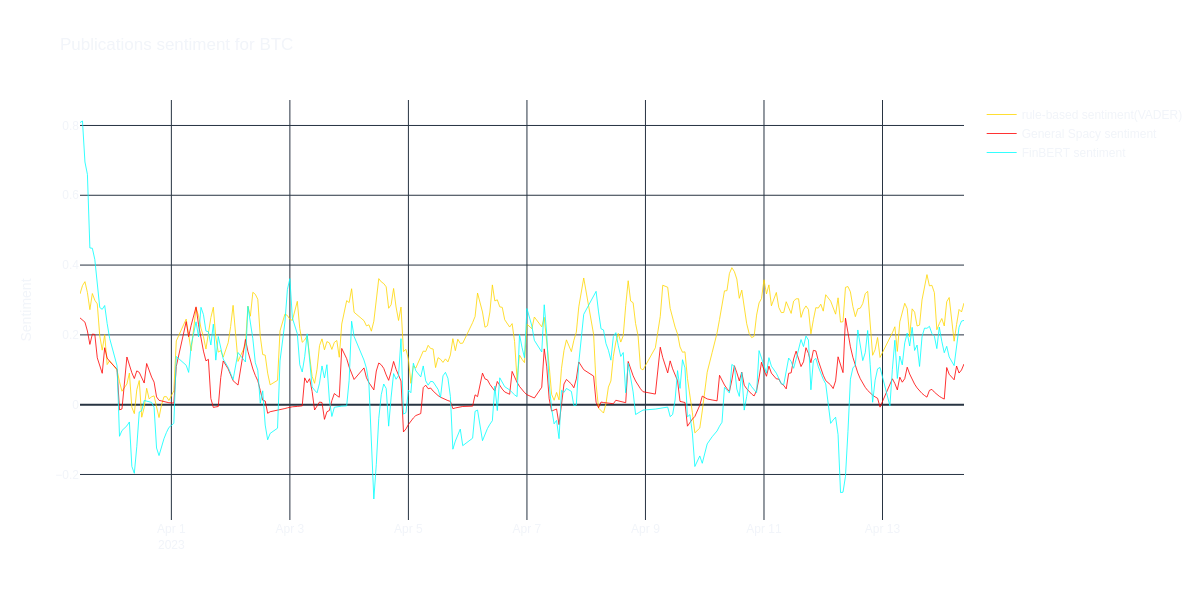

In [45]:
fig = make_subplots()

sentiment1_ewm = go.Scatter(x=sent1['time'],
                         y=sent1['ewm'],
                         name="rule-based sentiment(VADER)",
                         mode='lines',
                         line=dict(width=0.8, color='gold')
                         )

sentiment2_ewm = go.Scatter(x=sent2['time'],
                         y=sent2['ewm'],
                         name="General Spacy sentiment",
                         mode='lines',
                         line=dict(width=0.8, color='red')
                         )

sentiment3_ewm = go.Scatter(x=sent3['time'],
                         y=sent3['ewm'],
                         name="FinBERT sentiment",
                         mode='lines',
                         line=dict(width=0.8, color='cyan')
                         )

fig.add_trace(sentiment1_ewm)
fig.add_trace(sentiment2_ewm)
fig.add_trace(sentiment3_ewm)

fig.update_layout(
    width=1200, height=600,
    title="Publications sentiment for BTC",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_rangeslider_visible=False
)

# Set y-axes titles
fig.update_yaxes(title_text="Sentiment")

fig.show("png")

In [46]:
tohlcv_query = """SELECT time, p.symbol, open, high, low, close, volume, trades
FROM cex.binance.candles_hourly join cex.binance.pairs p on p.id = candles_hourly.pair_id
WHERE time >= now() - interval '15' day
  and pair_id = 1
ORDER BY time;"""

tohlcv_resp = client.get_data_response(tohlcv_query)
tohlcv_resp['time'] = pd.to_datetime(tohlcv_resp['time'])
tohlcv_resp.set_index('time')
tohlcv_resp

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,close,high,low,open,symbol,time,trades,volume
0,28644.790000000000000000,28710.150000000000000000,28580.650000000000000000,28602.480000000000000000,BTCUSDT,2023-03-30 11:00:00+00:00,46369.000000000000000000,2578.326410000000000000
1,28646.350000000000000000,28691.450000000000000000,28568.230000000000000000,28644.790000000000000000,BTCUSDT,2023-03-30 12:00:00+00:00,55574.000000000000000000,3072.810960000000000000
2,28517.960000000000000000,28646.350000000000000000,28410.340000000000000000,28646.340000000000000000,BTCUSDT,2023-03-30 13:00:00+00:00,68935.000000000000000000,3987.634920000000000000
3,28428.470000000000000000,28542.970000000000000000,28262.000000000000000000,28517.950000000000000000,BTCUSDT,2023-03-30 14:00:00+00:00,95054.000000000000000000,5658.187210000000000000
4,28300.330000000000000000,28482.130000000000000000,28169.500000000000000000,28428.480000000000000000,BTCUSDT,2023-03-30 15:00:00+00:00,81547.000000000000000000,4483.938480000000000000
...,...,...,...,...,...,...,...,...
355,30942.870000000000000000,31000.000000000000000000,30714.500000000000000000,30796.270000000000000000,BTCUSDT,2023-04-14 06:00:00+00:00,83016.000000000000000000,4121.464120000000000000
356,30733.720000000000000000,30963.690000000000000000,30725.010000000000000000,30942.860000000000000000,BTCUSDT,2023-04-14 07:00:00+00:00,74791.000000000000000000,3490.123100000000000000
357,30730.220000000000000000,30788.470000000000000000,30657.140000000000000000,30733.730000000000000000,BTCUSDT,2023-04-14 08:00:00+00:00,46257.000000000000000000,2525.377050000000000000
358,30794.160000000000000000,30798.290000000000000000,30700.000000000000000000,30730.220000000000000000,BTCUSDT,2023-04-14 09:00:00+00:00,37095.000000000000000000,1798.175590000000000000


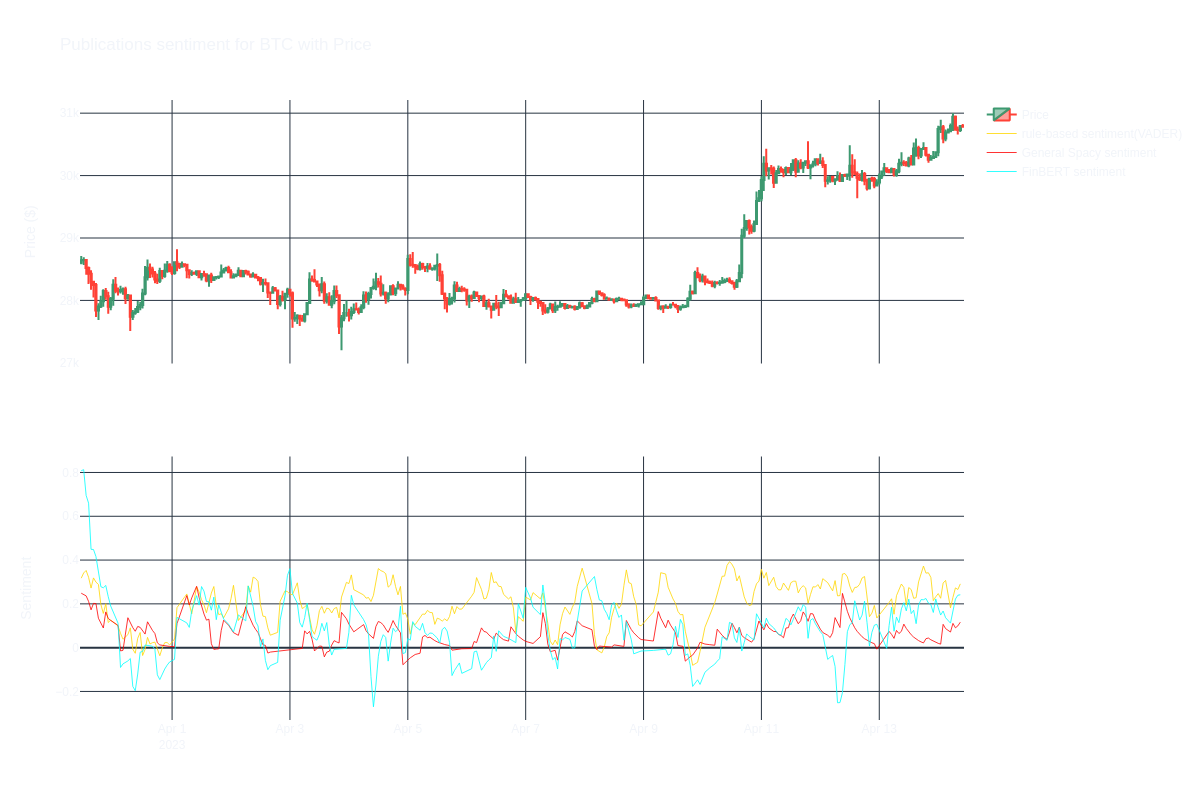

In [47]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

candlestick = go.Candlestick(
    x=tohlcv_resp['time'],
    open=tohlcv_resp['open'],
    high=tohlcv_resp['high'],
    low=tohlcv_resp['low'],
    close=tohlcv_resp['close'],
    name="Price"
)

fig.add_trace(candlestick, row=1, col=1)
fig.add_trace(sentiment1_ewm, row=2, col=1)
fig.add_trace(sentiment2_ewm, row=2, col=1)
fig.add_trace(sentiment3_ewm, row=2, col=1)

fig.update_layout(
    width=1200, height=800,
    title="Publications sentiment for BTC with Price",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_rangeslider_visible=False
)

# Set y-axes titles
fig.update_yaxes(title_text="Sentiment", row=2, col=1)
fig.update_yaxes(title_text="Price ($)", row=1, col=1)

fig.show("png"  )